# Laboratorio 2022-23

## Sesión 12: Álgebra lineal y dinámica de poblaciones


En esta sesión vamos a aplicar álgebra lineal elemental para estudiar modelos sencillos que describen cómo evoluciona un población. De la lectura previa conocemos algunos resultados teóricos. Con estos ejercicios comprobaremos la veracidad de estos resultados.

_Advertencia:_ Algunos métodos para matrices, como $\texttt{eigenvectors}\_\texttt{right}$, no funcionan cuando la matriz está definida en RR o CC, los anillos en los que Sagemath trabaja por defecto cuando encuentra números decimales y complejos, respectivamente. Otros métodos, por ejemplo  $\texttt{eigenvalues}$, sí funcionan, pero pueden tener problemas de precisión. Por ello, si vas a usar alguno de estos métodos conviene que definas la matriz en los anillos  QQ (racionales), RDF (Real Double Field) o CDF (Complex Double Field). 

____________

**Ejercicio 1** 

En una población de una determinada especie, los individuos se dividen en dos clases de edad:

- Clase $X$: individuos jóvenes de menos de 1 año. Estos individuos no tienen descendencia, y al cabo del año sobrevive un 60%.
- Clase $Y$: individuos adultos de más de 1 año. Cada uno de estos individuos tiene, en promedio, 3.5 crías cada año. Y al final del año, solo un 20% consigue sobrevivir una temporada más.

Denotamos por $X_n$, $Y_n$ la población de la clase $X$ y de la clase $Y$, respectivamente, en el año $n$. A la vista de los datos, la población de dos años consecutivos está relacionada por una expresión matricial de la forma

$$ \left(\begin{array}{c} X_{n+1} \\Y_{n+1} \end{array} \right)= \left(\begin{array}{cc} A & B \\ C & D \end{array} \right)\left(\begin{array}{c} X_{n} \\Y_{n} \end{array} \right).$$



a) Escribir la matriz de transición 

$$M=\left(\begin{array}{cc} A & B \\ C & D \end{array} \right)$$

con los valores correctos de $A$, $B$, $C$ y $D$ para este modelo. 
Comprobar que, aunque no se trata de una matriz de Leslie, tiene un autovalor dominante simple positivo. Determina el autovector normalizado correspondiente al autovalor dominante.

**Nota 1.** Recordar que los autovectores asociados a un autovalor $\lambda$ de una matriz cuadrada $A$ de tamaño $n$, son las soluciones al sistema lineal homogéneo $A-\lambda\cdot I_n=\vec{0}$ (con $I_n$ la matriz identidad de tamaño $n$). Con SageMath podemos obtener el espacio de autovectores asociados a $\lambda$ para una matriz $A$, con 
$$(A-\lambda\texttt{*identity}\_\texttt{matrix}(n))\texttt{.right}\_\texttt{kernel}()$$
y calculamos una **base** (una lista de vectores independientes) del mismo con
$$(A-\lambda\texttt{*identity}\_\texttt{matrix}(n))\texttt{.right}\_\texttt{kernel}()\texttt{.basis}()$$
(como lista, accedemos a cualquiera de sus elementos con la notación *slice*, $[\texttt{j}]$ con $\texttt{j}$ el índice del elemento que nos interese).

**Nota 2.** Si $A$ es una matriz, $A\texttt{.eigenvectors}\_\texttt{right}()$ devuelve una lista de pares $$(\texttt{autovalor, lista de autovectores independientes asociados al autovalor}).$$
En este ejercicio, en el que solo nos interesa uno de los autovalores, trabajar a partir de ella suele resultar más engorroso.

**Nota 3.** En este ejercicio, si el vector inicial de población (que está en el primer cuadrante) es no nulo, necesariamente tiene una componente no nula en la dirección del vector propio asociado al autovalor dominante.

In [3]:
# Matriz de transición y autovalores
M = matrix(QQ,[[0,3.5],[0.6,0.2]])
autovalores = M.eigenvalues()
print(f"Autovalores: {autovalores}")
      
# Comprobamos que hay un autovalor dominante
autovalor_dominante = autovalores[1]
print(f"Autovalor dominante: {autovalor_dominante}")

# Sacamos el autovector asociado
autovectores = M.eigenvectors_right()
autovector = autovectores[1]
autovector = autovector[1]
autovector = autovector[0]
print(f"Autovector: {autovector}")

# Calculamos la base de autovectores asociados al autovalor
# base = (M - autovalor_dominante*identity_matrix(2))
# show(f"Base: \n",base)

Autovalores: [-1.352583904633395?, 1.552583904633395?]
Autovalor dominante: 1.552583904633395?
Autovector: (1, 0.4435954013238272?)


b) Se parte de un distribución inicial de la población dada por $X_0=10$ e $Y_0=15$. Calcula los valores de $ X_n$ e $Y_n$ para $n= 0, 1, \dots, 50$, y represéntalos gráficamente frente al *tiempo* $n$ en un diagrama de puntos, con un color distinto para cada una de las dos clases de edad.

**Nota:** Para representar en forma de diagrama de puntos, conviene construir listas de pares $(n,X_n)$ y $(n,Y_n)$.

Poblaciones:


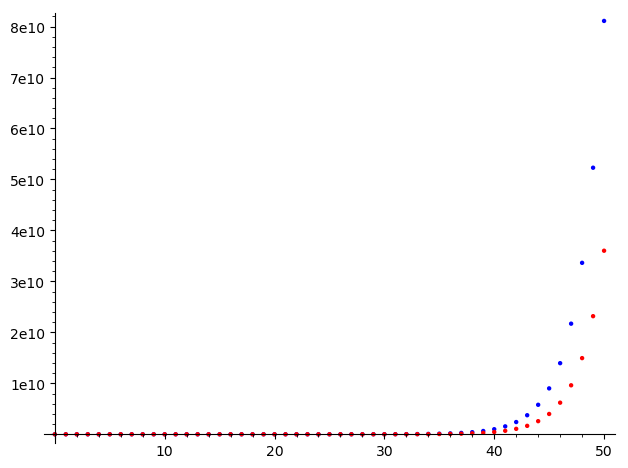

In [4]:
# Valores iniciales
lista_x = [(0,10)]
lista_y = [(0,15)]

# Calculamos el resto
for i in range(1,51):
    # Cogemos los valores que utilizaremos y calculamos el nuevo
    x = lista_y[i-1]; x = 3.5*x[1]
    y1 = lista_x[i-1]; y1 = 0.6*y1[1]
    y2 = lista_y[i-1]; y2 = 0.2*y2[1]
    
    # Creamos la dupla de puntos y la añadimos a la lista
    tupla_x = (i,x)
    tupla_y = (i,y1+y2)
    lista_x.append(tupla_x)
    lista_y.append(tupla_y)
    
print("Poblaciones:")
show((points(lista_x) + points(lista_y, color="red")))

c) De la lectura previa se sigue que asintóticamente (para $n$ grande} se tienen las leyes de crecimiento 

$$
\frac{X_{n+1}}{X_n}\approx \lambda_1,\qquad \frac{Y_{n+1}}{Y_n}\approx\lambda_1,
$$

donde $\lambda_1$ es el autovalor dominante de $M$. 

Sean $ CX_n=\frac{X_{n+1}}{X_{n}} $ y $CY_n=\frac{Y_{n+1}}{Y_{n}}$. Representa graficamente los pares de puntos $(n,CX_n)$ (en azul) y $(n,CY_n)$ (en azul) para $ n=0,\dots, 49$, junto con una recta horizontal a altura $\lambda_1$. De acuerdo con la teoría, deberías observar que tanto los puntos azules como los rojos se aproximan a la recta.

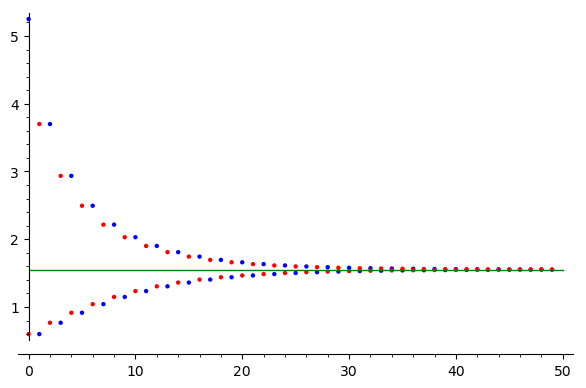

In [5]:
lista_CXn = []
lista_CYn = []
for i in range(0,50):
    tupla_x1 = lista_x[i+1]; tupla_x2 = lista_x[i]
    tupla_x = (i, tupla_x1[1]/tupla_x2[1])
    lista_CXn.append(tupla_x)
    
    tupla_y1 = lista_y[i+1]; tupla_y2 = lista_y[i]
    tupla_y = (i, tupla_y1[1]/tupla_y2[1])
    lista_CYn.append(tupla_y)

show((points(lista_CXn) + points(lista_CYn, color="red") + line([(0,autovalor_dominante),(50,autovalor_dominante)], color="green")))

d) Las leyes de crecimiento asintóticas indican que para tiempos $n$ grandes 

$$
X_n\approx \alpha \lambda_1^n,\qquad Y_n\approx \beta\lambda_1^n,
$$

donde $\alpha$ y $\beta$ son constantes no negativas que dependen del dato inicial. Compruébalo representando los puntos con escala logarítmica en el eje vertical (se consigue añadiendo la opción $\texttt{scale='semilogy'}$ al comando con el que generes el dibujo, como $\texttt{points}$ o $\texttt{plot}$). Los puntos se dispondrán asintóticamente sobre rectas de pendiente $\log\lambda_1$. Comprueba esta última afirmación. 

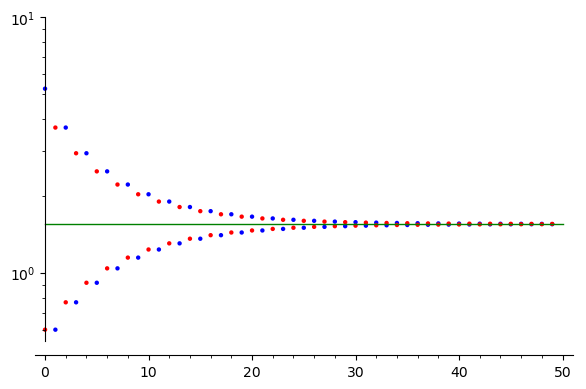

In [6]:
show((points(lista_CXn, scale="semilogy") + points(lista_CYn, color="red", scale="semilogy") + line([(0,autovalor_dominante),(50,autovalor_dominante)], color="green", scale="semilogy")))

Nuestro siguiente objetivo es comprobar que, según hemos visto en el documento previo, el ritmo de crecimiento asintótico (de ambas clases) no depende del dato inicial. Puesto que el problema es lineal, basta con que comprobemos este hecho para datos iniciales en la intersección de la circunferencia unidad con el primer cuadrante (en el caso de poblaciones solo tienen sentido los datos no negativos):

$$
(X_0,Y_0)=(\cos\theta,\operatorname{sen}\theta),\quad \theta\in(0,\pi/2).
$$

e) Calcula el cociente $ CX_{50}(\theta)=\frac{X_{50}(\theta)}{X_{49}(\theta)}$ para $\theta=j\frac\pi{200}$ con $j=1,\dots,99$, siendo $X_n(\theta)$ e $Y_n(\theta)$ las poblaciones en tiempo $n$ en las clases $X$ e $Y$ cuando los datos iniciales son $(X_0,Y_0)=(\cos\theta,\operatorname{sen}\theta)$. Representa la función $CX_{50}(\theta)$ así obtenida. Haz lo mismo para el cociente $CY_{50}(\theta)=\frac{Y_{50}(\theta)}{Y_{49}(\theta)}$.
    
**Nota.** En este apartado se van a utilizar ángulos con coseno o seno próximos a cero. Puesto que se pide dividir por una coordenada que puede ser próxima a cero, conviene trabajar con doble precisión cada vez que se tome un valor inicial de la forma $(\cos\theta,\operatorname{sen}\theta)$. Con $\texttt{vector}(\texttt{RDF},(a,b))$, SageMath toma $a$ y $b$ con doble precisión.

Poblaciones:


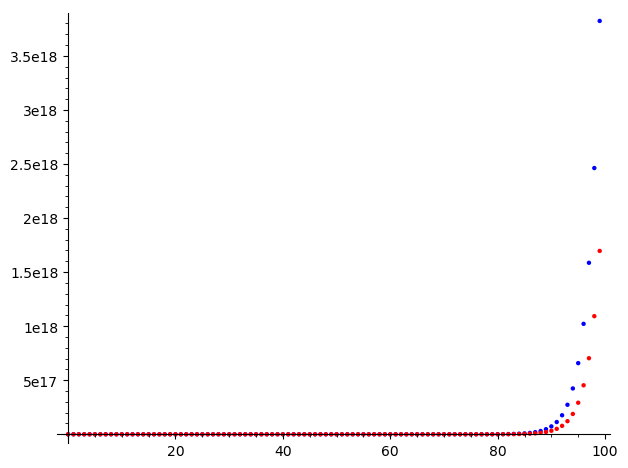

In [6]:
# Valores iniciales
lista_x = [(0,cos(0))]
lista_y = [(0,sin(0))]

# Calculamos el resto
for i in range(1,100):
    # Cogemos los valores que utilizaremos y calculamos el nuevo
    theta = j*pi/200
    print(theta)

    # Creamos la dupla de puntos y la añadimos a la lista
    tupla_x = (i,x)
    tupla_y = (i,y1+y2)
    lista_x.append(tupla_x)
    lista_y.append(tupla_y)

print("Poblaciones:")
show((points(lista_x) + points(lista_y, color="red")))

f) Consideramos los cocientes $ TX_n=\frac{X_{n}}{X_n+Y_n }$, $TY_n=\frac{Y_{n}}{X_n+Y_n}$, que nos indican la **proporción** de individuos en cada clase de edad en tiempo $n$. De acuerdo con lo que hemos aprendido en el documento previo, los vectores $(TX_n,TY_n)$ deberían aproximarse asintóticamente al autovector normalizado correspondiente al autovalor dominante $(a,b)$.

Partiendo de una población inicial $X_0=10$, $Y_0=15$, representa graficamente los pares de puntos $(n,TX_n)$ (en azul) y $(n,TY_n)$ (en azul) para $ n=0,\dots, 49$, junto con rectas horizontales a alturas $a$ y $b$. De acuerdo con la teoría, deberías observar que los puntos azules se acercan a la recta a altura $a$ y los rojos a la recta a altura $b$.

g) Ilustremos ahora la convergencia de la distribución de la población en clases de la que se habla en el apartado anterior de una forma dinámica.  Programa una animación (consultar la función $\texttt{animate}$) en la que se vea cómo, partiendo una vez más de una población inicial $X_0=10$, $Y_0=15$, va cambiando con $n$ el vector cuyas componentes son la proporción de individuos en cada clase de edad en el tiempo $n$, es decir el vector

$$ 
\left(\frac{X(n)}{X(n)+Y(n)}, \frac{Y(n)}{X(n)+Y(n)}\right).
$$


Nuestro siguiente objetivo es comprobar que la proporción límite de individuos en cada clase de edad no depende del dato inicial.  

h) Calcula las proporciones $ TX_{50}(\theta)=\frac{X_{50}(\theta)}{X_{50}(\theta)+Y_{50}(\theta)}$ y $TY_{50}(\theta)=\frac{Y_{50}(\theta)}{X_{50}(\theta)+Y_{50}(\theta)}$ para $\theta=j\frac\pi{200}$ con $j=1,\dots,99$, donde $X_n(\theta)$ e $Y_n(\theta)$ tienen el mismo significado que en el apartado d).  Representa las funciones $TX_{50}(\theta)$ y $TY_{50}(\theta)$ así obtenidas en una misma gráfica, usando para cada una un color.

____________


**Ejercicio 2** 

En una granja de cría de cerdos, los animales son clasificados según sus edades de la siguiente forma:

- Cochinillos: De $0$ a $1$ año.

- Lechones: De 1 a 2 años.

- Jóvenes: De 2 a 3 años.

- Adultos: De 3 a 4 años.

El procedimiento de gestión de las hembras de la granja es el siguiente:

- Se sacrifica al $60\%$ de las que van naciendo para su consumo como cochinillos.

- Se sacrifica para su consumo a todas las hembras cuando llegan a los $4$ años. No se sacrifica a ninguna de las demás, y se supone que ningún animal muere por otras causas.

- Se dedica a todas las hembras jóvenes y adultas a la cría. Se sabe que, en media, cada hembra joven tendrá $0.5$ camadas de $5$ cochinillos, cada hembra adulta tendrá $0.8$ camadas de $5$ cochinillos, y que el $50\%$ de todos los nuevos nacidos serán hembras.

a) Formula el modelo apropiado para describir la evolución de la población de las hembras.

b) Comprueba que el autovalor dominante es mayor que 1, y que por tanto la población crece sin límite, por lo que la granja no es sostenible con la tasa de sacrificio dada.    

c) Se aumenta la tasa de sacrificio al 80%. Comprobar que el autovalor dominante pasa a ser menor que 1, y que por tanto la población tiende a 0 asintóticamente, de forma que la granja tampoco es sostenible. 

d) Determina una tasa de sacrificio que haga que la granja sea sostenible, esto es, que haga que el  autovalor dominante sea igual a 1. 

**Indicación.** Pon la tasa de sacrificio  $\texttt{t}$  como un parámetro en el lugar adecuado de la matriz (debes decirle a SageMath que $\texttt{t}$ es una variable, para que lo entienda). La matriz, digamos $M_t$, dependerá de un parámetro, y los cálculos en SageMath, al no indicarle ningún anillo, se harán por defecto en el anillo simbólico $\texttt{SR}$. Calcula el polinomio característico 
$$P(x,t)=\texttt{det}(M_t-x*\texttt{identity}\_\texttt{matrix}(4))
\quad\text{ o también}\quad
P(x,t)=\texttt{charpoly}(M_t)
$$
y calcula el $\texttt{t}$ que asegura que $1$ es un autovalor: es decir $P(1,t)==0$. Asegúrate de que $1$ no solo es autovalor, sino que además es el autovalor dominante. 

(El procedimiento $\texttt{.substitute()}$ puede ser útil para, una vez calculado el valor adecuado de $t$, sustituirlo en la matriz $M_t$.)

e) Comprueba que con la tasa de sacrificio obtenida en d) la explotación es sostenible, calculando qué datos se obtienen hasta $n=500$.

Comprueba que la población total  se estabiliza a una cantidad no nula y la proporción de individuos por clase se estabiliza según las componentes del autovector normalizado asociado al autovalor dominante. 